#Trabajo Práctico Final: Redes Neuronales Convolucionales en TensorFlow

Participantes:
- Zoe Pérez Colman
- Bautista Czerniuk
- Benicio Pastorino
- Alvaro Saravia

Nuesto modelo se basaba en la clasificación de animales marinos entre diferentes clases pero luego de los problemas con ese dataset decidimos cambiarlo al dataset de Fashion Mnist

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
#Separamos en train y test
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
#Definimos nuestras clases
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##Analización del dataset
Checkeamos la cantidad de imagenes por clase tanto en train como en test para ver si es necesario que agreguemos imagenes en alguna clase para balancearlas.

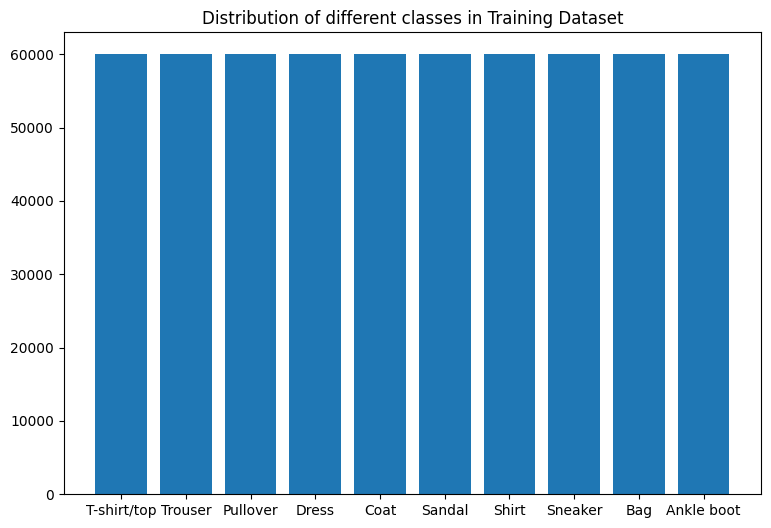

In [ ]:
#Vemos cuantas imagenes hay por clase para ver si debemos equilibrarlos
clases = classes
nimgs = {}
for i in clases:
    nimages = len(train_images)
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

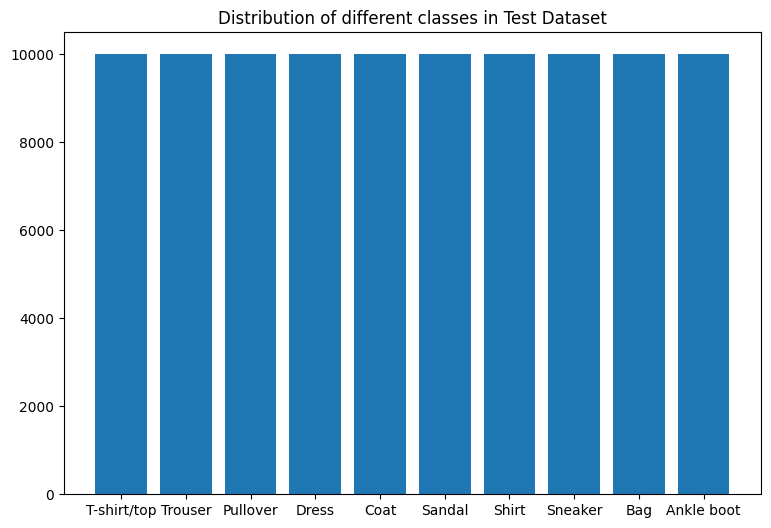

In [ ]:
#Vemos cuantas imagenes hay por clase para ver si debemos equilibrarlos
clases = classes
nimgs = {}
for i in clases:
    nimages = len(test_images)
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Test Dataset')
plt.show()

#Preprocessing
Vamos a escalar los valores a escalas de grises osea 0-255 para que estén entre 0 y 1. Al dividir cada valor de test y train por 255.0 hará que el modelo pueda procesarlos mas facilmente

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

##Modelo


Capa 1:Es nuestra capa de entreda con una forma de (28,28) para indicar que nuestra entrada debe tener esa forma, la cantidad de pixeles en las imagenes 28 x 28. Esta es una capa convolucional 2D. La convolución combina dos conjuntos de información para producir un tercero. La convolución se utilizamos para extraer características de la entrada. Tiene 64 kernels de 5x5 y utiliza la función de activación Exponential Linear Unit (ELU) que le permite a nuestro modelo aprender patrones mas dificiles. Luego aplique una capa de MaxPooling2D de 2x2 para reducir los datos analizados y unicamente guardar los mas relevantes.

Capa 2: Es una capa de aplanamiento (flatten), lo que significa que nuestra capa remodelará el array de forma (28,28) en un vector de 784 neuronas, de modo que cada píxel estará asociado con una neurona.

Capa 3: Esta es una capa oculta. Se llama "dense" por que esta completamente conectada, y cada neurona de la capa anterior se conectará con cada neurona de esta capa, utiliza la función de activación de la unidad lineal rectifica (ReLU).

Capa 4: Esta es nuestra capa de salida y también es una capa densa. Tiene 10 neuronas que examinaremos para determinar la salida de nuestro modelo. Cada neurona representa la probabilidad de que una imagen dada pertenezca a una de las 10 clases diferentes. La función de activación softmax se utiliza en esta capa para calcular una distribución de probabilidad para cada clase. Esto significa que el valor de cualquier neurona en esta capa estará entre 0 y 1, donde 1 representa una alta probabilidad de que la imagen pertenezca a esa clase.

In [ ]:
#Para saber la forma que tendran nuestras imagenes para especificar en el modelo
train_images.shape

(60000, 28, 28)

In [ ]:
model = tf.keras.models.Sequential([
    Conv2D(filters=64, kernel_size=5, activation='elu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

##Keras Visualizer

In [ ]:
%pip install keras-visualizer

In [ ]:
from keras import models, layers
from keras_visualizer import visualizer
visualizer(model, file_name='visualizer', file_format='png')

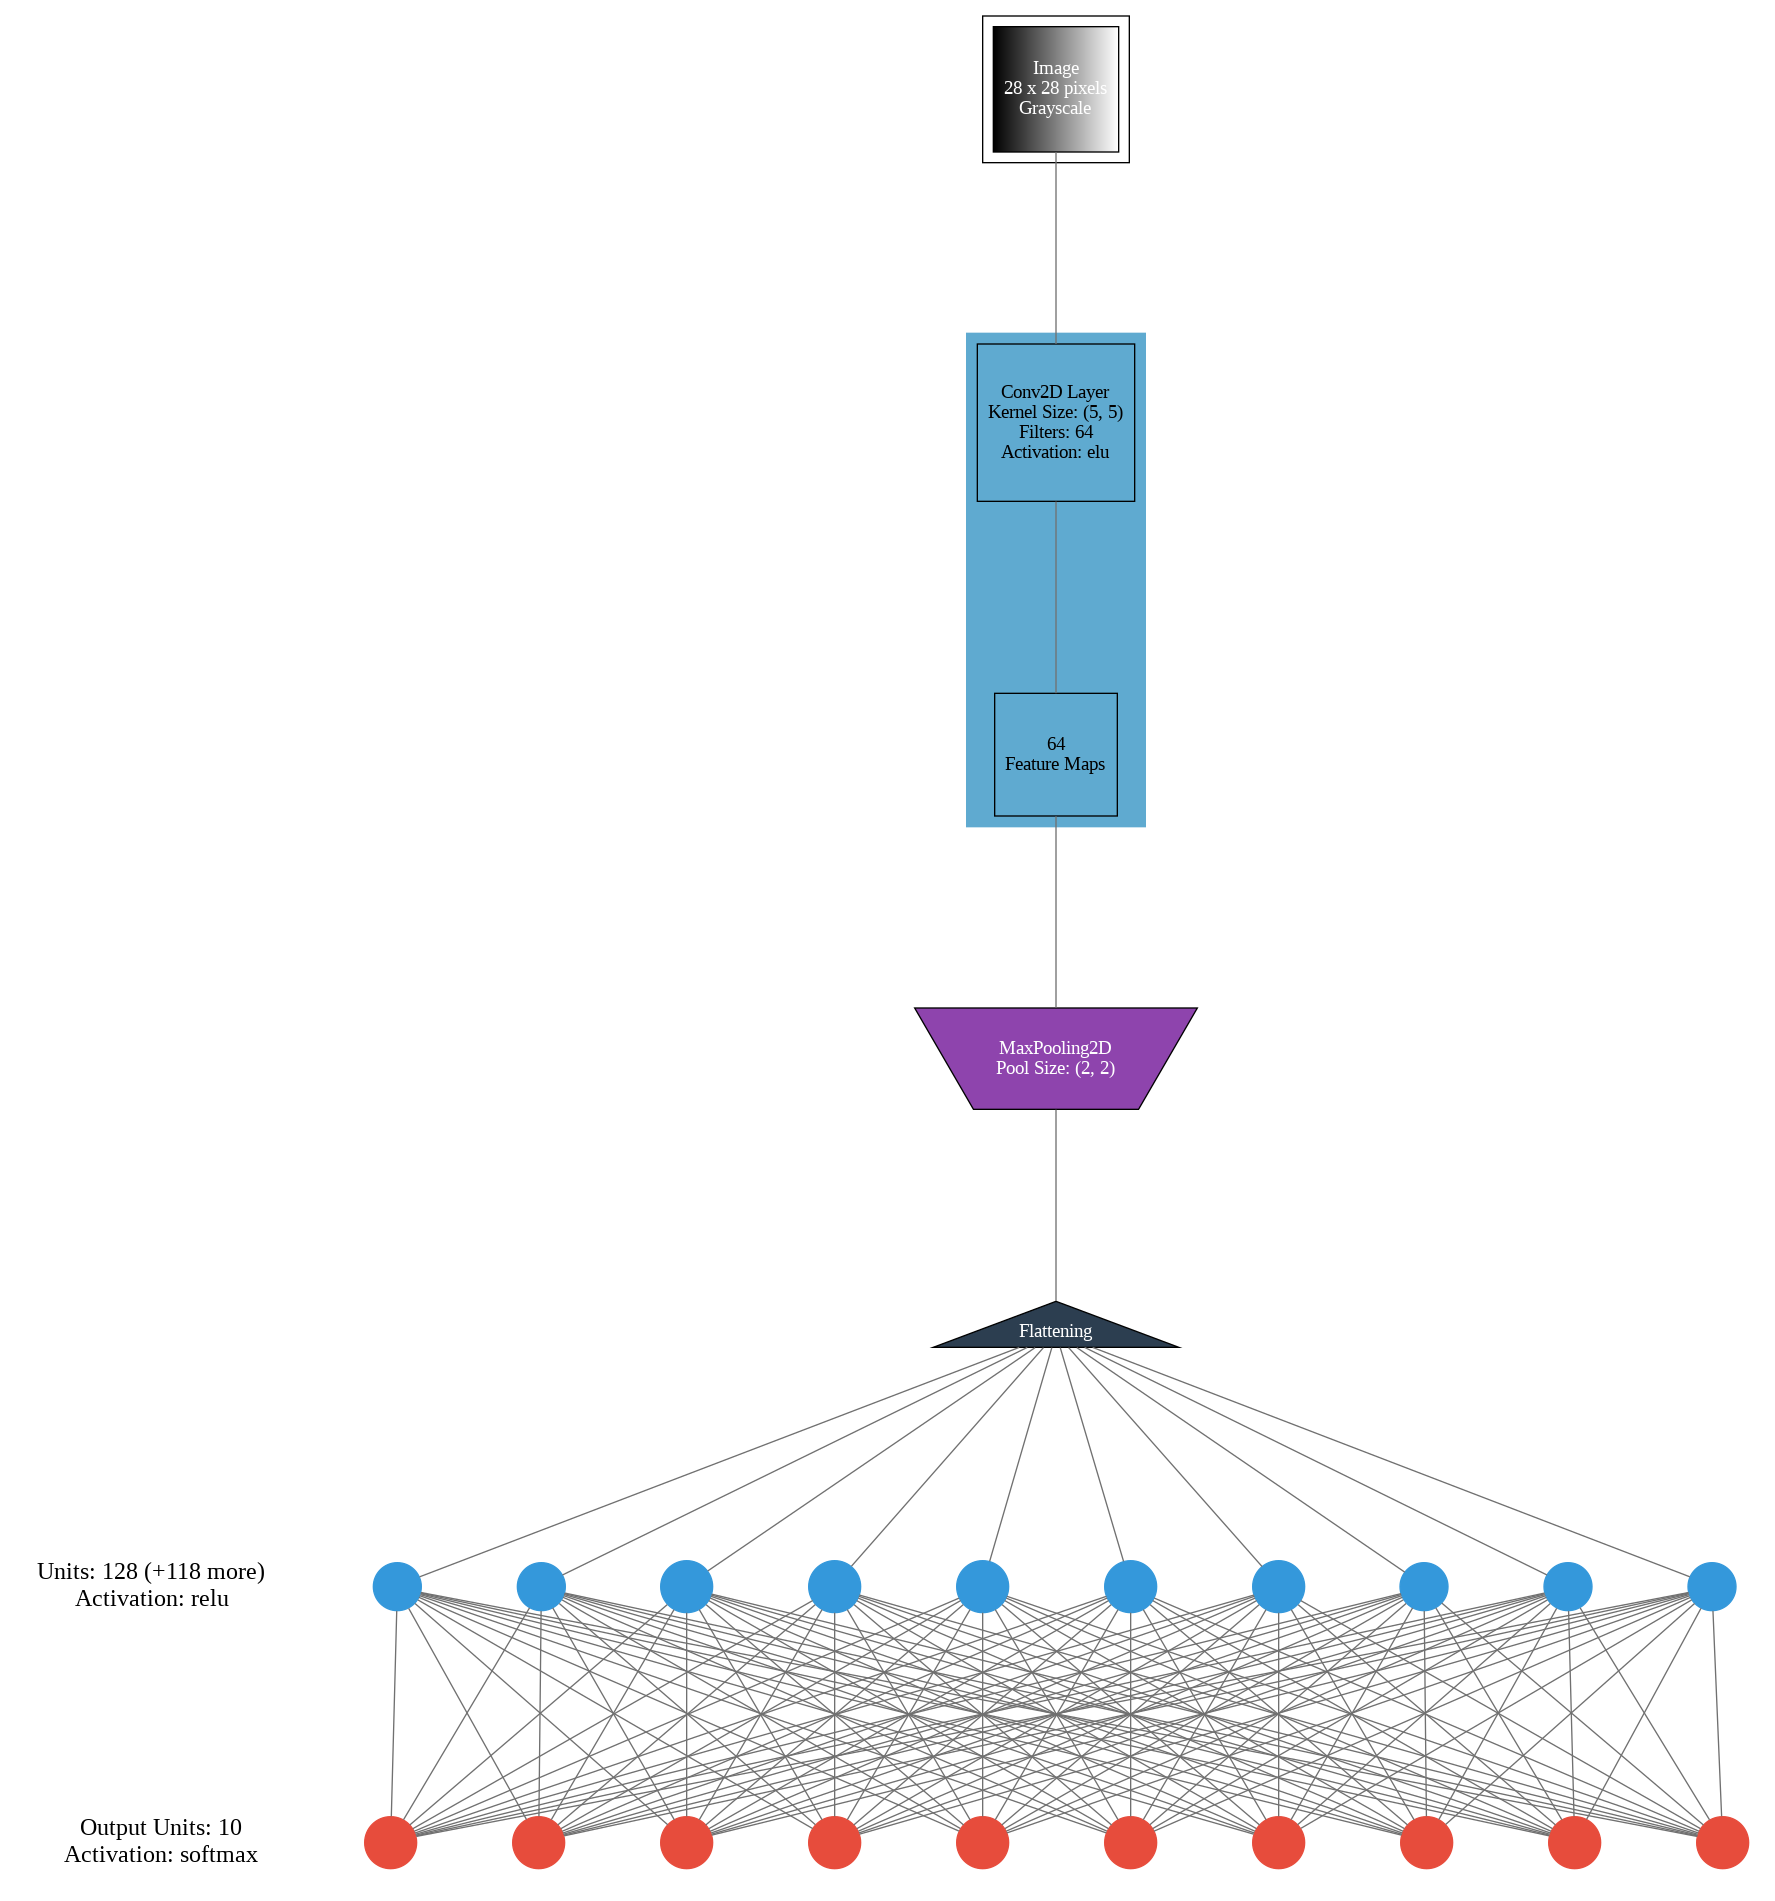

In [ ]:
from IPython.display import Image
Image('visualizer.png')

##Entrenamiento

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.3960 - accuracy: 0.8580
Epoch 2/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2701 - accuracy: 0.9014
Epoch 3/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.2202 - accuracy: 0.9194
Epoch 4/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1849 - accuracy: 0.9309
Epoch 5/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1579 - accuracy: 0.9405
Epoch 6/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1333 - accuracy: 0.9504
Epoch 7/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.1155 - accuracy: 0.9571
Epoch 8/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1015 - accuracy: 0.9618
Epoch 9/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0887 - accuracy: 0.9674
Epoch 10/10
1875/1875 [==============================] - 87s 46

##Test

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.4256 - accuracy: 0.9039
Test accuracy: 0.9039000272750854
